In [1]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import pandas as pd
import json
import os
from datetime import datetime
from pathlib import Path

In [2]:
# Import Data
microsoft_path = Path("Resources/MSFT.csv")
google_path = Path("Resources/GOOG.csv")
apple_path = Path("Resources/AAPL.csv")
facebook_path = Path("Resources/FB.csv")
sp500_path = Path("Resources/sp500.csv")

In [3]:
# Read stock data and index by date
microsoft_data = pd.read_csv(microsoft_path, index_col="Date", parse_dates=True)
google_data = pd.read_csv(google_path, index_col="Date", parse_dates=True)
apple_data = pd.read_csv(apple_path, index_col="Date", parse_dates=True)
facebook_data = pd.read_csv(facebook_path, index_col="Date", parse_dates=True)
sp500_data = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)

In [4]:
# Sample of microsoft data
microsoft_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...
2024-09-23,434.279999,436.459991,430.390015,433.510010,433.510010,15128900
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400


In [ ]:
# Sample of google data
google_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400


In [6]:
# Sample of apple data
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [7]:
# Sample of facebook data
facebook_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...
2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800,0,0
2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300,0,0
2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200,0,0


In [8]:
# Sample of S&P 500 stock index data
sp500_data

,S&P500
Date,
2014-10-08,1968.89
2014-10-09,1928.21
2014-10-10,1906.13
2014-10-13,1874.74
2014-10-14,1877.70
...,...
2024-10-01,5708.75
2024-10-02,5709.54
2024-10-03,5699.94


<Axes: title={'center': 'S&P 500 Index Closing Value'}, xlabel='Date'>

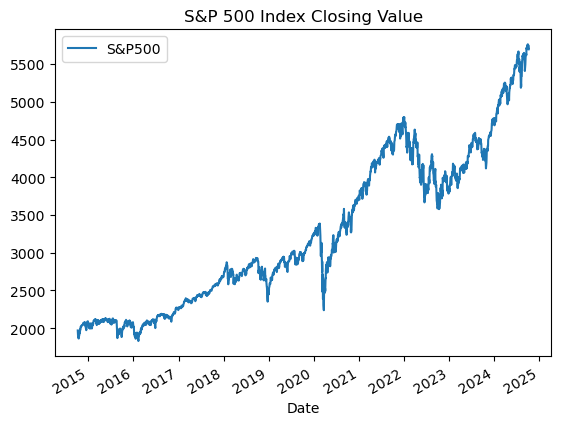

In [9]:
# Plot the closing value of S&P 500 stock index
sp500_data.plot(title="S&P 500 Index Closing Value")


In [17]:
# Join by Columns and add stock tocker as the key
joined_data_cols = pd.concat([microsoft_data, google_data, apple_data, facebook_data, sp500_data], axis="columns", join="inner", keys=["MSFT", "GOOG", "FB", "AAPL", "SP500"])
joined_data_cols

MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2014-10-08   45.480000   46.889999   45.340000   46.779999   39.997791   
2014-10-09   46.500000   46.799999   45.740002   45.849998   39.202633   
2014-10-10   45.599998   46.119999   43.950001   44.029999   37.646477   
2014-10-13   43.820000   44.560001   43.490002   43.650002   37.321583   
2014-10-14   43.869999   44.380001   43.560001   43.730000   37.389977   
...                ...         ...         ...         ...         ...   
2021-09-27  296.140015  296.470001  292.940002  294.170013  286.782837   
2021-09-28  289.799988  290.779999  282.750000  283.519989  276.400269   
2021-09-29  285.100006  286.769989  283.010010  284.000000  276.868195   
2021-09-30  285.709991  287.829987  281.619995  281.920013  274.840485   
2021-10-01  282.119995  289.980011  281.290009  289.100006  281.840179   

                            GOOG                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2014-10-08  33031000   28.201075   28.615437   27.798180   28.546625  ...   
2014-10-09  34422800   28.480806   28.496264   27.876465   27.967216  ...   
2014-10-10  51978100   27.809649   28.179134   27.128019   27.149960  ...   
2014-10-13  37100200   27.174891   27.399775   26.582020   26.587503  ...   
2014-10-14  38115700   26.871225   27.284590   26.585508   26.823357  ...   
...              ...         ...         ...         ...         ...  ...   
2021-09-27  23571700  141.585495  142.500000  140.500000  141.501007  ...   
2021-09-28  43186200  139.088501  139.606506  135.699997  136.184006  ...   
2021-09-29  26353700  137.109695  137.398499  134.250000  134.520996  ...   
2021-09-30  32343600  134.324997  135.589996  133.000000  133.265503  ...   
2021-10-01  30086300  133.554504  137.070999  133.377502  136.462494  ...   

                    FB                   AAPL                          \
             Adj Close     Volume        Open        High         Low   
Date                                                                    
2014-10-08   22.431545  229618800   76.180000   77.709999   75.099998   
2014-10-09   22.480503  309506000   77.279999   77.760002   75.849998   
2014-10-10   22.415968  265326400   75.589996   76.500000   72.760002   
2014-10-13   22.211231  214333600   73.230003   74.779999   72.519997   
2014-10-14   21.975346  254754400   74.000000   74.180000   72.050003   
...                ...        ...         ...         ...         ...   
2021-09-27  143.335434   74150700  349.809998  355.149994  347.079987   
2021-09-28  139.923874  108972300  347.970001  349.600006  338.920013   
2021-09-29  140.831024   74602000  343.149994  345.230011  338.880005   
2021-09-30  139.519608   89056700  340.450012  342.799988  338.149994   
2021-10-01  140.653503   94639600  341.609985  345.010010  338.640015   

                                                           SP500  
                 Close    Volume Dividends Stock Splits   S&P500  
Date                                                              
2014-10-08   77.519997  32976000         0            0  1968.89  
2014-10-09   75.910004  32487000         0            0  1928.21  
2014-10-10   72.910004  52146000         0            0  1906.13  
2014-10-13   72.989998  43938000         0            0  1874.74  
2014-10-14   73.589996  50299000         0            0  1877.70  
...                ...       ...       ...          ...      ...  
2021-09-27  353.579987  15205800         0            0  4443.11  
2021-09-28  340.649994  21710300         0            0  4352.63  
2021-09-29  339.609985  14452200         0            0  4359.46  
2021-09-30  339.390015  16547100         0            0  4307.54  
2021-10-

In [18]:
# Select only closing prices and volume for each stock
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices


,MSFT,GOOG,FB,AAPL
,Close,Close,Close,Close
Date,,,,
2014-10-08,46.779999,28.546625,25.200001,77.519997
2014-10-09,45.849998,27.967216,25.254999,75.910004
2014-10-10,44.029999,27.149960,25.182501,72.910004
2014-10-13,43.650002,26.587503,24.952499,72.989998
2014-10-14,43.730000,26.823357,24.687500,73.589996
...,...,...,...,...
2021-09-27,294.170013,141.501007,145.369995,353.579987
2021-09-28,283.519989,136.184006,141.910004,340.649994


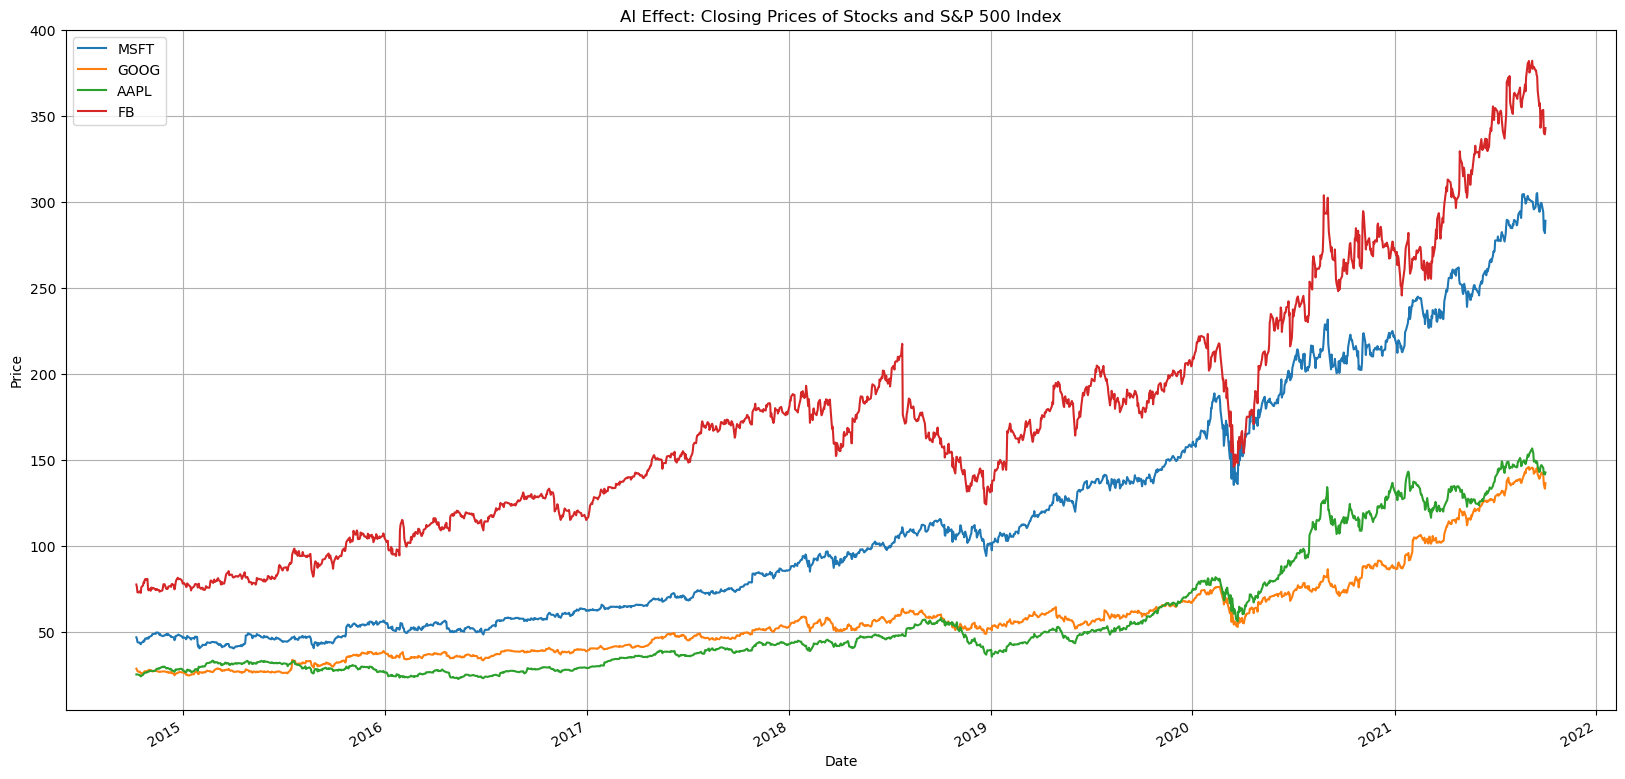

In [19]:
plot = closing_prices.plot(figsize=(20, 10), title="AI Effect: Closing Prices of Stocks and S&P 500 Index")
plot.set_xlabel("Date")
plot.set_ylabel("Price")
plot.legend(["MSFT", "GOOG", "AAPL", "FB", "SP500"])
plot.grid()

In [20]:
volumes = joined_data_cols.loc[:, pd.IndexSlice[:, "Volume"]]
volumes

,MSFT,GOOG,FB,AAPL
,Volume,Volume,Volume,Volume
Date,,,,
2014-10-08,33031000,39817018,229618800,32976000
2014-10-09,34422800,50496258,309506000,32487000
2014-10-10,51978100,61638766,265326400,52146000
2014-10-13,37100200,51633371,214333600,43938000
2014-10-14,38115700,44451708,254754400,50299000
...,...,...,...,...
2021-09-27,23571700,18844000,74150700,15205800
2021-09-28,43186200,42190000,108972300,21710300


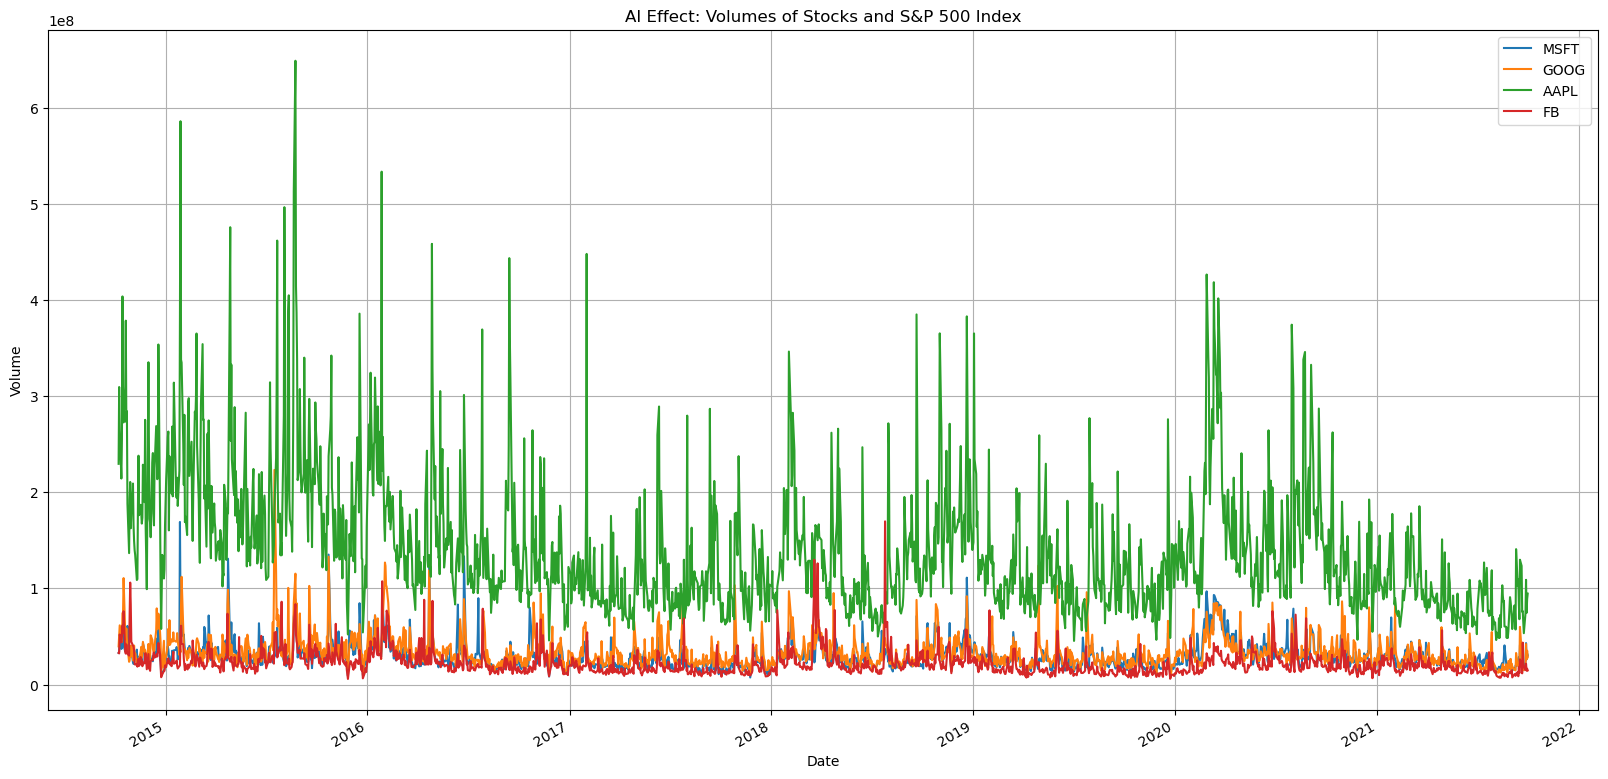

In [21]:
plot = volumes.plot(kind="line", figsize=(20, 10), title="AI Effect: Volumes of Stocks and S&P 500 Index")
plot.set_xlabel("Date")
plot.set_ylabel("Volume")
plot.legend(["MSFT", "GOOG", "AAPL", "FB"])
plot.grid()